In [126]:
import pandas as pd
import numpy as np
import sys
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot


In [3]:
##setup google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
##setup path
root_path = '/content/drive/MyDrive/W210 - Capstone Project/data'

In [5]:
##import dataset
df_broadband_tr = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/broadband_training_2.csv', encoding = 'ISO-8859-1')

# Machine Learning Model for Broadband training dataset



In [59]:
df_broadband_tr.head()

,tract_geoid,All_Provider_Count,All_Providers,MaxAdDown,MaxAdUp,AllMaxAdDown,AllMaxAdUp,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,Wired_Provider_Count_100,Satellite_Provider_Count_100,NAME,median_age_overall,median_age_male,median_age_female,state,county,tract,employment_rate,median_income,total_households,ave_household_size,ave_family_size,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,...,pct_pop_foreign_born,pct_pop_ssi_households,pct_pop_lt_10k,pct_pop_10k_thru_15k,pct_pop_15k_thru_20k,pct_pop_20k_thru_25k,pct_pop_25k_thru_30k,pct_pop_30k_thru_35k,pct_pop_35k_thru_40k,pct_pop_40k_thru_45k,pct_pop_45k_thru_50k,pct_pop_50k_thru_60k,pct_pop_60k_thru_75k,pct_pop_75k_thru_100k,pct_pop_100k_thru_125k,pct_pop_125k_thru_150k,pct_pop_150k_thru_200k,pct_pop_gt_200k,pct_pop_lt_5,pct_pop_5_to_9,pct_pop_10_to_14,pct_pop_15_to_19,pct_pop_20_to_24,pct_pop_25_to_29,pct_pop_30_to_34,pct_pop_35_to_39,pct_pop_40_to_44,pct_pop_45_to_49,pct_pop_50_to_54,pct_pop_55_to_59,pct_pop_60_to_64,pct_pop_65_to_69,pct_pop_70_to_74,pct_pop_75_to_79,pct_pop_80_to_84,pct_pop_gt_85,pct_pop_disability,pct_pop_households_with_kids,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps)
0,24031700607,7,"{56004, 54694, 59246, 55027, 59349, 55574, 55262}",987.0,880.0,"{0.0, 2.0, 35.0, 3.0, 5.0, 940.0, 25.0, 987.0}","{0.0, 0.768, 1.3, 3.0, 35.0, 880.0}",3.0,4,0.0,4.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,"Census Tract 7006.07, Montgomery County, Maryland",43.4,44.5,42.4,24.0,31.0,700607.0,65.3,188813.0,2333.0,3.18,3.32,100.0,99.3,96.8,7424.0,715200.0,34.8,3.9,7.0,0.4,50.4,...,111.751152,5.950500,1.500214,3.000429,0.000000,1.114445,0.000000,0.000000,2.700386,0.000000,0.000000,2.014574,5.615088,7.029576,10.972996,9.215602,9.344192,47.492499,5.253233,7.785560,5.778556,10.600754,3.327047,3.838901,2.909483,4.067888,9.900323,10.102371,5.792026,9.725216,7.475754,6.384698,3.852371,2.693966,0.431034,0.080819,3.811961,1.997428,132.108002,88.997002
1,37005950200,9,"{58561, 55394, 56004, 56741, 54694, 59475, 568...",1000.0,500.0,"{0.0, 2.0, 35.0, 1000.0, 12.0, 25.0, 30.0}","{0.064, 0.0, 1.0, 3.0, 1.3, 5.0, 500.0}",3.0,4,2.0,4.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,"Census Tract 9502, Alleghany County, North Car...",46.2,43.7,48.1,37.0,5.0,950200.0,50.2,32388.0,1581.0,2.27,2.78,99.3,80.2,99.4,3711.0,139700.0,81.0,12.9,3.7,1.1,1.0,...,89.610390,44.902635,7.400380,12.397217,8.349146,9.867173,8.602151,8.285895,4.427577,5.566097,2.087287,11.321948,5.313093,7.843137,3.225806,0.442758,2.656546,2.213789,5.227701,4.500135,10.105093,5.604958,3.179736,4.715710,4.176772,4.554029,6.817569,5.066020,5.119914,5.928321,9.862571,5.524117,6.467259,6.898410,3.826462,2.425222,17.921645,1.986085,36.334999,34.022999
2,20027458200,10,"{55394, 58883, 56004, 54694, 54860, 67058, 593...",1000.0,1000.0,"{0.0, 0.768, 2.0, 3.0, 35.0, 100.0, 6.0, 1.5, ...","{0.0, 0.512, 0.064, 3.0, 1.0, 0.384, 0.128, 0....",4.0,4,5.0,4.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,"Census Tract 4582, Clay County, Kansas",43.6,37.9,50.6,20.0,27.0,458200.0,61.4,46083.0,2025.0,2.12,2.83,98.0,85.4,100.0,4388.0,87400.0,95.0,2.4,1.4,0.0,0.6,...,159.403670,6.173994,6.074074,6.320988,4.543210,3.604938,3.160494,13.679012,3.604938,6.765432,5.777778,8.246914,18.419753,6.716049,5.283951,0.938272,4.148148,2.716049,5.218778,6.426618,10.391978,2.324521,4.079307,3.805834,6.221513,6.403829,6.198724,4.329991,6.449407,3.144941,10.346399,6.654512,5.423883,3.418414,3.828624,5.332726,19.925599,1.308642,67.499001,48.374001
3,48091310801,17,"{56448, 59520, 58623, 56004, 54694, 55084, 562...",1000.0,1000.0,"{0.0, 1.5, 2.0, 3.0, 100.0, 5.0, 6.0, 1000.0, ...","{0.0, 1.5, 1.0, 35.0, 3.0, 4.0, 0.512, 0.768, ...",10.0,4,3.0,9.0,5.0,3.0,4.0,2.0,0.0,4.0,1.0,"Census Tract 310

In [8]:
df_broadband_tr.shape

(52535, 111)

In [60]:
df_broadband_tr.describe()

,tract_geoid,All_Provider_Count,MaxAdDown,MaxAdUp,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,Wired_Provider_Count_100,Satellite_Provider_Count_100,median_age_overall,median_age_male,median_age_female,state,county,tract,employment_rate,median_income,total_households,ave_household_size,ave_family_size,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,...,pct_pop_foreign_born,pct_pop_ssi_households,pct_pop_lt_10k,pct_pop_10k_thru_15k,pct_pop_15k_thru_20k,pct_pop_20k_thru_25k,pct_pop_25k_thru_30k,pct_pop_30k_thru_35k,pct_pop_35k_thru_40k,pct_pop_40k_thru_45k,pct_pop_45k_thru_50k,pct_pop_50k_thru_60k,pct_pop_60k_thru_75k,pct_pop_75k_thru_100k,pct_pop_100k_thru_125k,pct_pop_125k_thru_150k,pct_pop_150k_thru_200k,pct_pop_gt_200k,pct_pop_lt_5,pct_pop_5_to_9,pct_pop_10_to_14,pct_pop_15_to_19,pct_pop_20_to_24,pct_pop_25_to_29,pct_pop_30_to_34,pct_pop_35_to_39,pct_pop_40_to_44,pct_pop_45_to_49,pct_pop_50_to_54,pct_pop_55_to_59,pct_pop_60_to_64,pct_pop_65_to_69,pct_pop_70_to_74,pct_pop_75_to_79,pct_pop_80_to_84,pct_pop_gt_85,pct_pop_disability,pct_pop_households_with_kids,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps)
count,5.253500e+04,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,5.253500e+04,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,...,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000,52535.000000
mean,2.771746e+10,10.726887,962.773580,644.073557,5.598839,3.996460,1.322661,5.102960,3.024193,0.671971,2.468069,1.994251,0.213705,2.323537,0.496336,39.618909,38.420325,40.811293,27.631884,85.337128,239561.627734,59.768231,69145.494965,1718.967945,2.648475,3.221179,95.150848,87.528891,99.015435,4622.128257,2.860023e+05,61.217109,17.686002,12.269363,0.671979,5.281188,0.157289,0.252483,2.464519,47.474497,...,118.013731,24.580560,6.117333,4.374696,4.476751,4.592317,4.420460,4.608698,4.244243,4.216992,3.855944,7.514402,9.654122,12.607832,9.005502,5.931575,6.696059,7.683074,5.953266,6.021698,6.248787,6.237578,6.619752,7.166106,6.779662,6.406227,6.019886,6.329891,6.622188,6.827220,6.402728,5.387256,4.074261,2.870536,1.968255,2.064704,12.953642,2.258240,91.063960,17.149637
std,1.590160e+10,3.080577,139.518886,433.444125,2.700450,0.067779,1.448876,1.387006,1.179354,0.942639,0.958917,0.082119,0.491519,0.905475,0.499991,7.648159,7.801250,8.054199,15.875607,100.625850,333910.836812,9.764099,33444.385851,817.181996,0.504528,0.450210,6.266495,9.752792,2.818750,2327.381867,2.517009e+05,29.210625,21.800664,19.486886,3.739774,9.452845,1.042719,0.868933,2.478169,15.874076,...,26.871805,19.967170,5.363143,3.710716,3.355292,3.155549,2.938031,2.897822,2.650365,2.562486,2.355442,3.380698,3.821819,4.706798,4.325512,3.786561,5.242516,9.696718,2.514414,2.404479,2.480848,3.488509,4.735152,3.800454,3.029489,2.269066,2.047612,2.058092,2.115974,2.25

In [61]:
df_broadband_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52535 entries, 0 to 52534
Columns: 111 entries, tract_geoid to Ookla Median Upload Speed (Mbps)
dtypes: float64(102), int64(5), object(4)
memory usage: 44.5+ MB


### Train test split
linear regression on target variable = pct of high school degree + 

In [63]:
## get a list of numerical feature
numeric_feats = df_broadband_tr.dtypes[df_broadband_tr.dtypes == "float64"].index.values.tolist()
numeric_feats

['MaxAdDown',
 'MaxAdUp',
 'Wired_Provider_Count',
 'Fixed_Wireless_Provider_Count',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Fixed_Wireless_Provider_Count_25',
 'Wired_Provider_Count_25',
 'Satellite_Provider_Count_25',
 'Fixed_Wireless_Provider_Count_100',
 'Wired_Provider_Count_100',
 'Satellite_Provider_Count_100',
 'median_age_overall',
 'median_age_male',
 'median_age_female',
 'state',
 'county',
 'tract',
 'employment_rate',
 'median_income',
 'total_households',
 'ave_household_size',
 'ave_family_size',
 'pct_health_ins_children',
 'pct_health_ins_19_64',
 'pct_health_ins_65+',
 'total_population',
 'median_house_value',
 'pct_white',
 'pct_hisp_latino',
 'pct_black',
 'pct_native',
 'pct_asian',
 'pct_hi_pi',
 'pct_other_race',
 'pct_two+_race',
 'pct_rent_burdened',
 'poverty_rate',
 'pct_pop_bachelors+',
 'pct_pop_hs+',
 'pct_internet',
 'pct_internet_dial_up',
 'pct_internet_broadband_any_type',
 'pct_internet_cellular',
 'pct_only_cellular',
 'pct_internet_

In [88]:
##drop some variables that are not numerical, highly correlated to dependent varible (bachelors degree)

to_drop = ['pct_pop_hs+','pct_pop_bachelors+','All_Providers', 'AllMaxAdDown',	'AllMaxAdUp', 'NAME','tract_geoid'	]
target = ['pct_pop_hs+']

X = df_broadband_tr.drop(to_drop, axis = 'columns', inplace=False)
y = df_broadband_tr[target]

##split into train and test 80/20 random split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### LR 1: Include all variables (except the ones dropped earlier)

In [89]:
## linear regression model using sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [90]:
## predict on x test 
y_pred = lr.predict(X_test)

y_pred

array([[56.51663365],
       [69.89543787],
       [52.7992103 ],
       ...,
       [40.9680118 ],
       [69.07683492],
       [71.08644259]])

In [91]:
## look at coeffcients

pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":lr.coef_[0]})

,Feature,Coefficients
0,All_Provider_Count,0.288268
1,MaxAdDown,-0.001068
2,MaxAdUp,0.001121
3,Wired_Provider_Count,-0.385455
4,Satellite_Provider_Count,0.465174
...,...,...
99,pct_pop_gt_85,0.157173
100,pct_pop_disability,-0.185706
101,pct_pop_households_with_kids,-0.098062
102,Ookla Median Download Speed (Mbps),-0.007582


In [92]:
lr.score(X_test,y_test)

0.8485680827269914

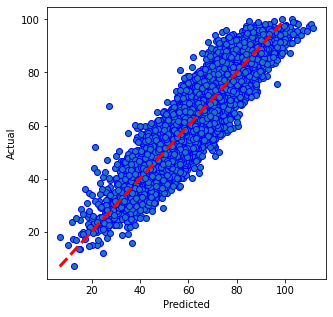

In [93]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()


#### LR 1: Model evaluation metrics

In [94]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(mse**(1/2.0)))
print('R2 score is {}'.format(r2))
print('Adj R2 score is {}'.format(adj_r2))

The model performance for testing set
--------------------------------------
MAE is 4.8924221286675
MSE is 38.21522775112942
RMSE is 6.181846629537926
R2 score is 0.8485680827269914
Adj R2 score is 0.8470540547134946


### LR 2: Model with high correlation variables (corr > |0.5|)

In [95]:
corr = df_broadband_tr.corr()
edu_corr = corr['pct_pop_hs+']

In [96]:
## find variables with |correlation| > 0.5 
high_corr =edu_corr[abs(edu_corr)>0.5]
high_corr.sort_values(ascending=False)

pct_pop_hs+                        1.000000
pct_pop_bachelors+                 0.889987
pct_computer_with_broadband        0.690920
pct_internet_broadband_any_type    0.684840
pct_internet                       0.684270
median_income                      0.671597
pct_pop_gt_200k                    0.636075
pct_computer                       0.634611
pct_internet_cellular              0.632695
pct_pop_150k_thru_200k             0.601797
pct_health_ins_19_64               0.598467
pct_computer_no_internet          -0.532907
poverty_rate                      -0.547225
pct_pop_ssi_households            -0.610098
pct_no_computer                   -0.634611
pct_internet_none                 -0.698517
Name: pct_pop_hs+, dtype: float64

In [97]:
#combine both positively and negatively correlated variables with corr >0.3
var_high_corr = high_corr.index.tolist()
print(var_high_corr)

['median_income', 'pct_health_ins_19_64', 'poverty_rate', 'pct_pop_bachelors+', 'pct_pop_hs+', 'pct_internet', 'pct_internet_broadband_any_type', 'pct_internet_cellular', 'pct_internet_none', 'pct_computer', 'pct_computer_with_broadband', 'pct_computer_no_internet', 'pct_no_computer', 'pct_pop_ssi_households', 'pct_pop_150k_thru_200k', 'pct_pop_gt_200k']


In [98]:
#limit the dataset to only the relevant variables

ind_var = ['poverty_rate', 'pct_internet_none', 'pct_computer_no_internet',
           'pct_no_computer', 'pct_pop_ssi_households', 'median_income',
           'pct_health_ins_19_64',
           'pct_internet', 'pct_internet_broadband_any_type', 
           'pct_internet_cellular', 'pct_computer', 'pct_computer_with_broadband',
           'pct_pop_150k_thru_200k', 'pct_pop_gt_200k']



target = ['pct_pop_hs+']

X = df_broadband_tr[ind_var]
y = df_broadband_tr[target]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [99]:
lr_2 = LinearRegression()
lr_2.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = lr_2.predict(X_test)

y_pred

array([[56.77984717],
       [68.13849207],
       [49.66912183],
       ...,
       [36.27169413],
       [66.12845911],
       [67.31125098]])

In [101]:
pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":lr_2.coef_[0]})

,Feature,Coefficients
0,poverty_rate,0.005156
1,pct_internet_none,-0.579255
2,pct_computer_no_internet,-0.171755
3,pct_no_computer,-0.176037
4,pct_pop_ssi_households,-0.154458
5,median_income,-0.000168
6,pct_health_ins_19_64,0.398371
7,pct_internet,-0.819985
8,pct_internet_broadband_any_type,-0.067065
9,pct_internet_cellular,0.116240


#### LR 2: Model evaluation metrics

In [102]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(mse**(1/2.0)))
print('R2 score is {}'.format(r2))
print('Adj R2 score is {}'.format(adj_r2))

The model performance for testing set
--------------------------------------
MAE is 7.1663246373852365
MSE is 83.55419092113559
RMSE is 9.140798155584422
R2 score is 0.668907603801769
Adj R2 score is 0.6684658106692132


we can see that the metrics dropped pretty significantly.

### LR 3: Adding all broadband-related variables in addition to the above high correlation variables

In [103]:
#limit the dataset to only the relevant variables

ind_var = ['poverty_rate', 'pct_internet_none', 'pct_computer_no_internet',
           'pct_no_computer', 'pct_pop_ssi_households', 'median_income',
           'pct_health_ins_19_64',
           'pct_internet', 'pct_internet_broadband_any_type', 
           'pct_internet_cellular', 'pct_computer', 'pct_computer_with_broadband',
           'pct_pop_150k_thru_200k', 'pct_pop_gt_200k',
           'MaxAdDown',
            'MaxAdUp',
            'Wired_Provider_Count',
            'Fixed_Wireless_Provider_Count',
            'All_Provider_Count_25',
            'All_Provider_Count_100',
            'Fixed_Wireless_Provider_Count_25',
            'Wired_Provider_Count_25',
            'Satellite_Provider_Count_25',
            'Fixed_Wireless_Provider_Count_100',
            'Wired_Provider_Count_100',
            'Satellite_Provider_Count_100',
            'Ookla Median Download Speed (Mbps)',
            'Ookla Median Upload Speed (Mbps)']



target = ['pct_pop_hs+']

X = df_broadband_tr[ind_var]
y = df_broadband_tr[target]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [104]:
lr_3 = LinearRegression()
lr_3.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = lr_3.predict(X_test)

y_pred

array([[55.65965622],
       [66.36262061],
       [49.3636011 ],
       ...,
       [37.69902358],
       [65.47198226],
       [66.6502732 ]])

In [106]:
pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":lr_3.coef_[0]})

,Feature,Coefficients
0,poverty_rate,0.012826
1,pct_internet_none,-0.578759
2,pct_computer_no_internet,-0.098210
3,pct_no_computer,-0.134196
4,pct_pop_ssi_households,-0.145524
5,median_income,-0.000159
6,pct_health_ins_19_64,0.401603
7,pct_internet,-0.826996
8,pct_internet_broadband_any_type,0.007559
9,pct_internet_cellular,0.094076


#### LR3: Model evaluation metrics

In [107]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(mse**(1/2.0)))
print('R2 score is {}'.format(r2))
print('Adj R2 score is {}'.format(adj_r2))

The model performance for testing set
--------------------------------------
MAE is 7.044958837023942
MSE is 80.70912044408942
RMSE is 8.98382549051847
R2 score is 0.6801814991170521
Adj R2 score is 0.6793268591070576


As expected, these newly added boradband variables are not adding much improvement to the model.

### LR 4: Using feature selection to determine the best set of features

In [108]:
##drop some variables that are not numerical, highly correlated to dependent varible (bachelors degree)

to_drop = ['pct_pop_hs+','pct_pop_bachelors+','All_Providers', 'AllMaxAdDown',	'AllMaxAdUp', 'NAME','tract_geoid'	]
target = ['pct_pop_hs+']

X = df_broadband_tr.drop(to_drop, axis = 'columns', inplace=False)
y = df_broadband_tr[target]

##split into train and test 80/20 random split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [109]:
## preprocessing features
unwanted_num = {'pct_pop_hs+','pct_pop_bachelors+','All_Providers', 
                'AllMaxAdDown',	'AllMaxAdUp', 'NAME','tract_geoid','MaxAdDown','MaxAdUp'}
NUM_FEATURES = [ele for ele in numeric_feats if ele not in unwanted_num]


num_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),   
])
cat_pipe = Pipeline(steps=[    
    ('encode', OneHotEncoder(drop='first')),   
    ('scale', StandardScaler(with_mean=False)),
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, NUM_FEATURES)
], remainder='drop')

In [114]:
## use cross-validation to select the features based on R-squared and adj. R-squared

r2scores=[]
adjustedr2 = []
feature_names=[]
for i in range(1, 98):   
    reduce_dim_pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('reduce_dim', SelectKBest(k=i, score_func=f_regression)),       
    ])
    
    pipeline = Pipeline(steps=[
        ('reduce_dim_pipe', reduce_dim_pipe),       
        ('regress', LinearRegression())
    ])
    
    #calculate cross validated R2
    R2 = cross_val_score(pipeline, X=X_train, y=y_train,cv=10, scoring='r2').mean()    
    r2scores.append(R2)
        
    #calculate Adj R2
    n= len(X_train)
    p = i #len(X.columns)
    adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
#     print(r2, adjustedr2)
    adjustedr2.append(adj_R2)
    
    reduce_dim_pipe.fit(X=X_train, y=y_train)
    # Get columns to keep    
    cols = reduce_dim_pipe.named_steps['reduce_dim'].get_support(indices=True)
    # Create new dataframe with only desired columns
#     print(cols)
    features_df_new = X_train.iloc[:, cols]
    best_features = list(features_df_new.columns)
#     print(best_features)
    feature_names.append(best_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [117]:
scoring_df = pd.DataFrame(np.column_stack((r2scores, adjustedr2)), columns=['R2', 'Adj_R2'])
scoring_df['feature_names'] = feature_names
scoring_df['features'] = range(1, 98)
scoring_df

,R2,Adj_R2,feature_names,features
0,0.488982,0.488970,[pct_internet_broadband_satellite],1
1,0.494066,0.494042,"[pct_internet_broadband_satellite, pct_interne...",2
2,0.499816,0.499780,"[pct_rent_burdened, pct_internet_broadband_sat...",3
3,0.500017,0.499969,"[pct_other_race, pct_rent_burdened, pct_intern...",4
4,0.572346,0.572295,"[state, pct_other_race, pct_rent_burdened, pct...",5
...,...,...,...,...
92,0.848818,0.848482,"[All_Provider_Count, MaxAdDown, MaxAdUp, Wired...",93
93,0.848778,0.848439,"[All_Provider_Count, MaxAdDown, MaxAdUp, Wired...",94
94,0.848653,0.848310,"[All_Provider_Count, MaxAdDown, MaxAdUp, Wired...",95
95,0.848961,0.848616,"[All_Provider_Count, MaxAdDown, MaxAdUp, Wired...",96


Text(0.5, 1.0, 'Plot between number of features and R2/Adj R2 scores')

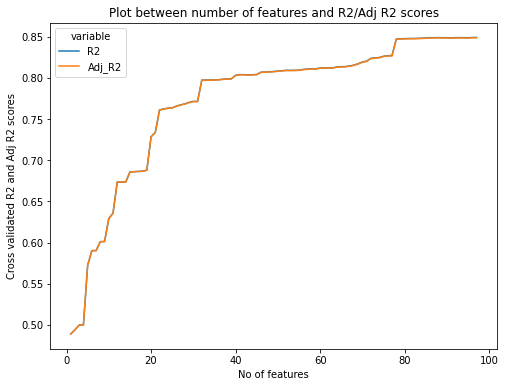

In [118]:
fig, ax = plt.subplots(figsize=(8, 6))
#convert data frame from wide format to long format so that we can pass into seaborn line plot function to draw multiple line plots in same figure
# https://stackoverflow.com/questions/52308749/how-do-i-create-a-multiline-plot-using-seaborn
long_format_df = pd.melt(scoring_df.loc[:, ['features','R2', 'Adj_R2']], ['features'])
sns.lineplot(x='features', y='value', hue='variable', data=long_format_df, ax=ax)
ax.set_xlabel('No of features')
ax.set_ylabel('Cross validated R2 and Adj R2 scores')
ax.set_title('Plot between number of features and R2/Adj R2 scores')

We can see from the graph and tables that our model does not really suffer from overfitting since adj.R-squared continue to increase as we adding more features. However, starting from 30 features, the increase in R-sqr and adj R-Sqr become very slow until we # of features > 80. Therefore, depends on how many variables we want to include in the model, we can include more features if we want to have more accuracy or we can stop at 40+ features to limit to the most import ones.

## Random Forest

In [136]:
# Fitting Random Forest Regression to the dataset

# create regressor object
rf_rg = RandomForestRegressor(n_estimators = 500, random_state = 0)

# fit the regressor with x and y data
rf_rg.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(n_estimators=500, random_state=0)

In [137]:
y_pred = rf_rg.predict(X_test)

y_pred

array([58.25215179, 64.7286894 , 60.38227626, ..., 35.8877864 ,
       66.06706661, 75.55435187])

In [138]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(mse**(1/2.0)))
print('R2 score is {}'.format(r2))
print('Adj R2 score is {}'.format(adj_r2))

The model performance for testing set
--------------------------------------
MAE is 4.395030252745132
MSE is 31.573642777967883
RMSE is 5.619042870273183
R2 score is 0.8748860717958313
Adj R2 score is 0.8736351730712366


#### Feature importance

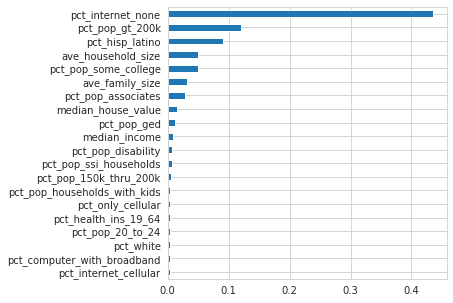

In [151]:
# (pd.Series(rf_rg.feature_importances_, index=X_test.columns)
#    .nlargest(20)[::-1]
#    .plot(kind='barh')
#    )  
   

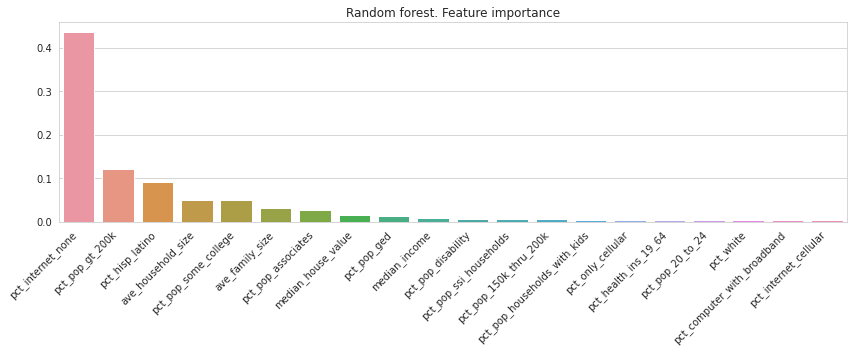

In [167]:
# Calculate feature importances
importances = rf_rg.feature_importances_

# Visualize Feature Importance
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
top_k = 20
new_indices = indices[:top_k]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in new_indices]

plt.figure(figsize = (12, 5))
sns.set_style("whitegrid")
chart = sns.barplot(x = names, y=importances[new_indices])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Random forest. Feature importance')
plt.tight_layout()

#### Hyperparameter Tuning

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_rg.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
random_forest_tuning = RandomForestRegressor(random_state = 0)

In [ ]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [ ]:
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(X_train, y_train)

In [ ]:
GSCV.best_params_

In [ ]:
random_forest_tuned = RandomForestRegressor(criterion= 'mae',max_depth= 8,max_features= 'sqrt',n_estimators =100,random_state = 0)
random_forest_tuned.fit(X_train, y_train)
y_pred = random_forest_tuned.predict(X_test)

In [ ]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(mse**(1/2.0)))
print('R2 score is {}'.format(r2))
print('Adj R2 score is {}'.format(adj_r2))

## XGBoost

In [9]:
#  The dataset needs to be converted into DMatrix.
# It is an optimized data structure that the creators of XGBoost made. 
# It gives the package its performance and efficiency gains.
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [10]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 2500)

In [11]:
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

[16:24:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [14]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(mse**(1/2.0)))
print('R2 score is {}'.format(r2))
print('Adj R2 score is {}'.format(adj_r2))

The model performance for testing set
--------------------------------------
MAE is 3.5430637686620376
MSE is 20.541922997967767
RMSE is 4.53231982520737
R2 score is 0.9186004384347851
Adj R2 score is 0.9177786949520097


### Hyperparameter Tuning

In [15]:
## Here we will tune the below hyperparameters that are usually having a big impact on performance
params = {
    # Parameters that we are going to tune.
    'max_depth':5,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 0.3,
    'learning_rate' : 0.1,
    'alpha': 10,
    'n_estimator': 10,
    # Other parameters
    'objective':'reg:linear',
}

In [16]:
# set evaluation metrics to be rmse
params['eval_metric'] = "rmse"

In [19]:
num_boost_round = 3000

In [20]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best RMSE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))


[16:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:59.4143
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:53.6431
[2]	Test-rmse:48.427
[3]	Test-rmse:43.7398
[4]	Test-rmse:39.534
[5]	Test-rmse:35.7506
[6]	Test-rmse:32.3737
[7]	Test-rmse:29.323
[8]	Test-rmse:26.6103
[9]	Test-rmse:24.1602
[10]	Test-rmse:21.9813
[11]	Test-rmse:20.0307
[12]	Test-rmse:18.2939
[13]	Test-rmse:16.7465
[14]	Test-rmse:15.3834
[15]	Test-rmse:14.1665
[16]	Test-rmse:13.1019
[17]	Test-rmse:12.1513
[18]	Test-rmse:11.301
[19]	Test-rmse:10.5683
[20]	Test-rmse:9.9188
[21]	Test-rmse:9.35008
[22]	Test-rmse:8.85936
[23]	Test-rmse:8.43152
[24]	Test-rmse:8.05585
[25]	Test-rmse:7.71431
[26]	Test-rmse:7.45235
[27]	Test-rmse:7.2249
[28]	Test-rmse:7.00641
[29]	Test-rmse:6.83207
[30]	Test-rmse:6.68603
[31]	Test-rmse:6.55967
[32]	Test-rmse:6.44763
[33]	Test-rmse:6.35241
[34]	Test-rmse:6.2683
[35]	Test-rmse:6.19231
[36]	

In [21]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={"rmse"},
    early_stopping_rounds=10
)
cv_results

[16:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,59.582272,0.047864,59.585140,0.195694
1,53.769572,0.046334,53.773717,0.183210
2,48.542256,0.046184,48.545710,0.169040
3,43.845145,0.040946,43.853912,0.160588
4,39.630565,0.051121,39.644457,0.140156
...,...,...,...,...
1324,2.212843,0.014113,4.645570,0.041431
1325,2.212025,0.014228,4.645530,0.041625
1326,2.210902,0.014364,4.645451,0.041716
1327,2.209932,0.014535,4.645431,0.041821


In [22]:
# get the min of all aboce
cv_results['test-rmse-mean'].min()


4.645207599999999

In [23]:
# tune hyperparamter "max_depth" and "min_child_weight"
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,8)
    for min_child_weight in range(0,5)
]

In [24]:
# Define initial best params and MAE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=3, min_child_weight=0
[16:56:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:56:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:56:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:56:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:56:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 4.6801886 for 1921 rounds
CV with max_depth=3, min_child_weight=1
[17:05:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

KeyboardInterrupt: ignored

In [25]:
# update parameters according to the above result
params['max_depth'] = 2
params['min_child_weight'] = 2

In [26]:
# Parameters subsample and colsample_bytree
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(1,5)]
    for colsample in [i/10. for i in range(1,5)]
]

In [27]:
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=0.4, colsample=0.4
[17:59:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [115]:
## update parameters
params['subsample'] = 0.4
params['colsample_bytree'] = 0.4

In [29]:

params = {
    # Parameters that we are going to tune.
    'max_depth':5,
    'min_child_weight': 2,
    'eta':.3,
    'subsample': 1.0,
    'colsample_bytree': 0.3,
    'learning_rate' : 0.1,
    'alpha': 10,
    'n_estimator': 10,
    # Other parameters
    'objective':'reg:linear',
}




In [30]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

[18:01:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:59.4143
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:53.6425
[2]	Test-rmse:48.4265
[3]	Test-rmse:43.7393
[4]	Test-rmse:39.5334
[5]	Test-rmse:35.7499
[6]	Test-rmse:32.373
[7]	Test-rmse:29.323
[8]	Test-rmse:26.6103
[9]	Test-rmse:24.16
[10]	Test-rmse:21.981
[11]	Test-rmse:20.032
[12]	Test-rmse:18.2954
[13]	Test-rmse:16.7492
[14]	Test-rmse:15.3864
[15]	Test-rmse:14.1723
[16]	Test-rmse:13.1084
[17]	Test-rmse:12.1579
[18]	Test-rmse:11.3063
[19]	Test-rmse:10.5742
[20]	Test-rmse:9.92473
[21]	Test-rmse:9.35223
[22]	Test-rmse:8.86772
[23]	Test-rmse:8.43986
[24]	Test-rmse:8.06125
[25]	Test-rmse:7.71701
[26]	Test-rmse:7.45433
[27]	Test-rmse:7.22538
[28]	Test-rmse:7.00575
[29]	Test-rmse:6.83223
[30]	Test-rmse:6.6864
[31]	Test-rmse:6.55748
[32]	Test-rmse:6.44604
[33]	Test-rmse:6.34468
[34]	Test-rmse:6.26047
[35]	Test-rmse:6.18523
[36]	

In [31]:
num_boost_round = model.best_iteration + 1
xg_rg = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[18:03:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:59.4143
[1]	Test-rmse:53.6425
[2]	Test-rmse:48.4265
[3]	Test-rmse:43.7393
[4]	Test-rmse:39.5334
[5]	Test-rmse:35.7499
[6]	Test-rmse:32.373
[7]	Test-rmse:29.323
[8]	Test-rmse:26.6103
[9]	Test-rmse:24.16
[10]	Test-rmse:21.981
[11]	Test-rmse:20.032
[12]	Test-rmse:18.2954
[13]	Test-rmse:16.7492
[14]	Test-rmse:15.3864
[15]	Test-rmse:14.1723
[16]	Test-rmse:13.1084
[17]	Test-rmse:12.1579
[18]	Test-rmse:11.3063
[19]	Test-rmse:10.5742
[20]	Test-rmse:9.92473
[21]	Test-rmse:9.35223
[22]	Test-rmse:8.86772
[23]	Test-rmse:8.43986
[24]	Test-rmse:8.06125
[25]	Test-rmse:7.71701
[26]	Test-rmse:7.45433
[27]	Test-rmse:7.22538
[28]	Test-rmse:7.00575
[29]	Test-rmse:6.83223
[30]	Test-rmse:6.6864
[31]	Test-rmse:6.55748
[32]	Test-rmse:6.44604
[33]	Test-rmse:6.34468
[34]	Test-rmse:6.26047
[35]	Test-rmse:6.18523
[36]	Test-rmse:6.1272
[37]	Test-rmse:6.06833
[38]	Test-rmse:6.

In [33]:

# model evaluation for testing set
mse_xgboost = mean_squared_error(xg_rg.predict(dtest), y_test)
mae_xgboost = mean_absolute_error(xg_rg.predict(dtest), y_test)
r2_xgboost = metrics.r2_score(y_test,xg_rg.predict(dtest))
adj_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )

# print("RMSE: %f" % (rmse_xgboost)**(1/2))

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_xgboost))
print('MSE is {}'.format(mse_xgboost))
print('RMSE is {}'.format(mse_xgboost**(1/2.0)))
print('R2 score is {}'.format(r2))
print('Adj R2 score is {}'.format(adj_r2))

The model performance for testing set
--------------------------------------
MAE is 3.6292306441120434
MSE is 21.502880383038782
RMSE is 4.637119837036647
R2 score is 0.9186004384347851
Adj R2 score is 0.9177786949520097


### Feature importance

In [34]:
xg_rg = xgb.train(params=params, dtrain=dtrain, num_boost_round=10)

[18:07:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


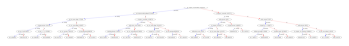

In [35]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_rg,num_trees=0)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

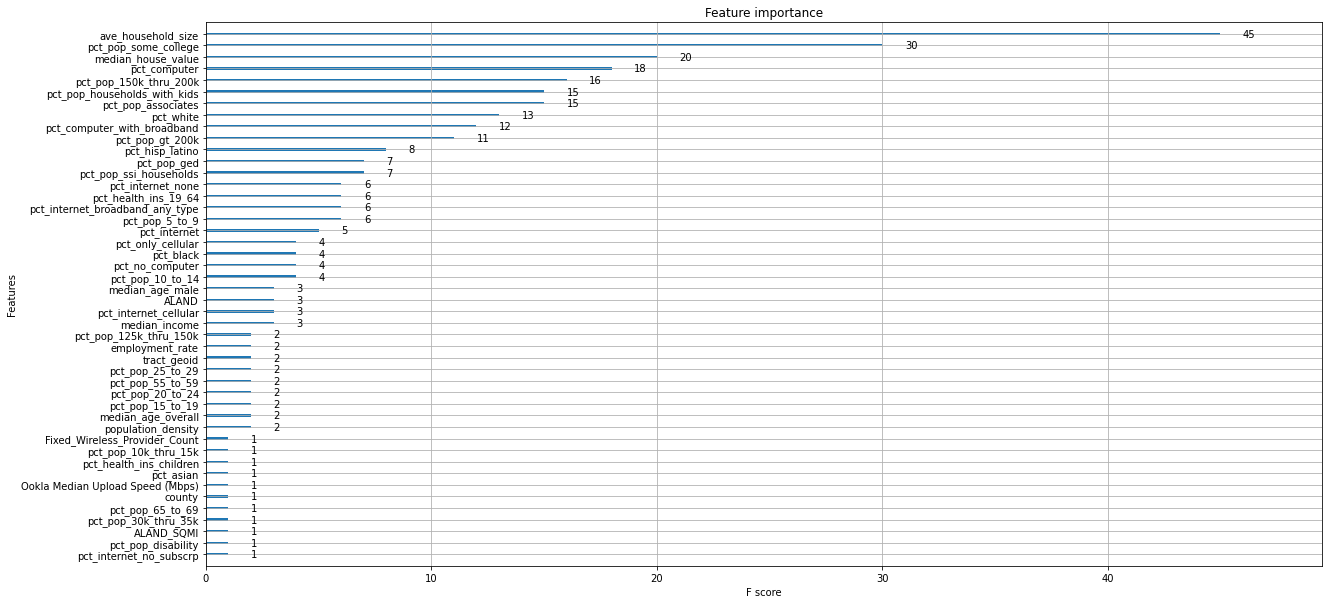

In [36]:
xgb.plot_importance(xg_rg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
# # Calculate feature importances
# importances = xg_rg.get_booster().get_score(importance_type='weight')

# # Visualize Feature Importance
# # Sort feature importances in descending order
# indices = np.argsort(importances)[::-1]

# # Rearrange feature names so they match the sorted feature importances
# names = [all_train_features.columns[i] for i in indices]

# plt.figure(figsize = (12, 5))
# sns.set_style("whitegrid")
# chart = sns.barplot(x = names, y=importances[indices])
# plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
# plt.title('XGBoost. Feature importance')
# plt.tight_layout()

## EDA

#### 1.1 Education

##### Percent of population with a college degree

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


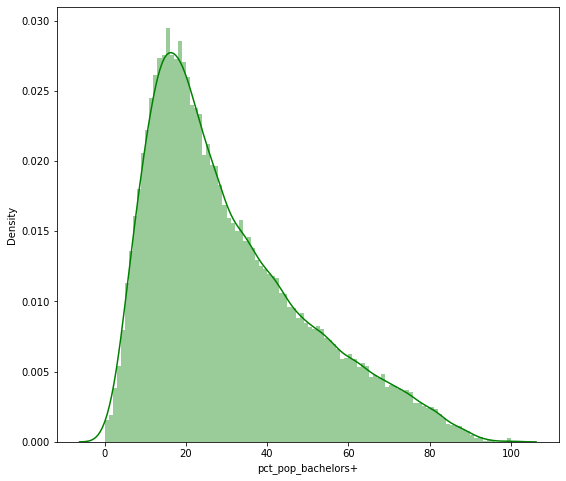

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(df_broadband['pct_pop_bachelors+'], color='g', bins=100, hist_kws={'alpha': 0.4});

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


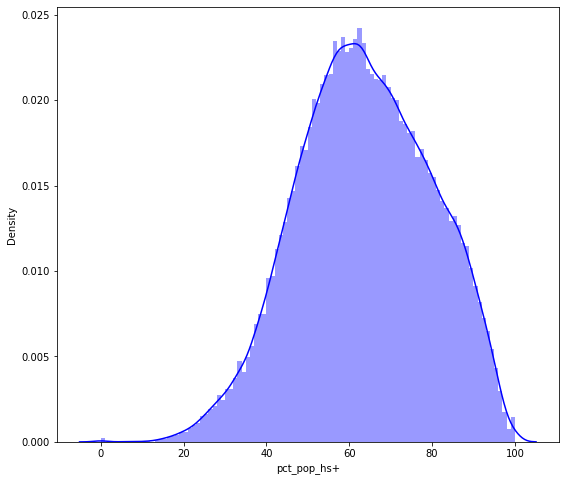

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(df_broadband['pct_pop_hs+'], color='b', bins=100, hist_kws={'alpha': 0.4});

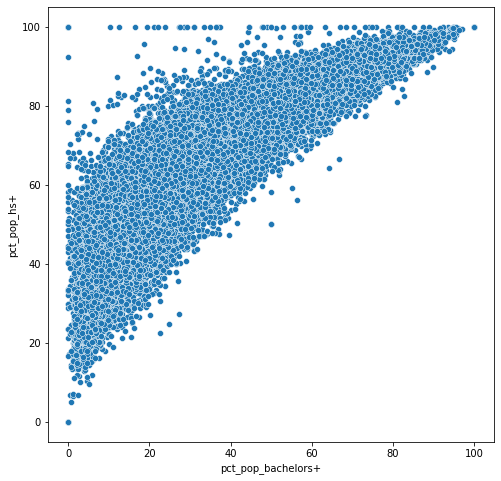

In [ ]:
# explore relationship between pct with high shcool vs. pct with bachelors degree
plt.figure(figsize = (8,8))
sns.scatterplot(data=df_broadband, x="pct_pop_bachelors+", y="pct_pop_hs+")

## we can see that the positive relationship makes sense since areas with higher %of high school degree are
## likely to have higher % of college degree

In [ ]:
df_broadband_1=df_broadband[['pct_pop_bachelors+','pct_pop_hs+','state']]

df_broadband_1.groupby(['state']).mean()


,pct_pop_bachelors+,pct_pop_hs+
state,,
1.0,23.330211,58.448092
2.0,28.416059,68.417650
4.0,28.854604,66.237938
5.0,21.013171,56.639733
6.0,33.183584,64.205260
8.0,39.863800,73.692212
9.0,38.286716,65.946986
10.0,31.966967,61.416609
11.0,54.943257,74.533043


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


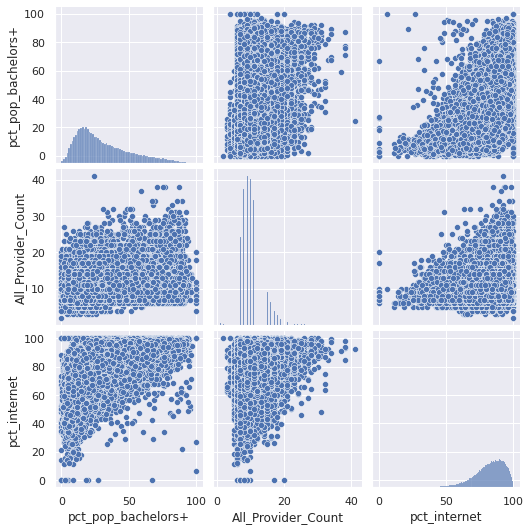

In [ ]:
sns.set()
cols = ['pct_pop_bachelors+', 'All_Provider_Count',
        'pct_internet']
sns.pairplot(df_broadband[cols], size = 2.5)
plt.show()

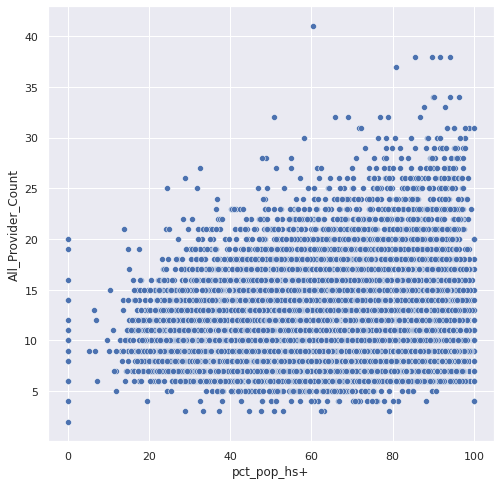

In [ ]:
# explore relationship between pct with high shcool vs. pct with bachelors degree
plt.figure(figsize = (8,8))
sns.scatterplot(data=df_broadband, x="pct_pop_hs+", y="All_Provider_Count")

## we can see that the positive relationship makes sense since areas with higher %of high school degree are
## likely to have higher % of college degree

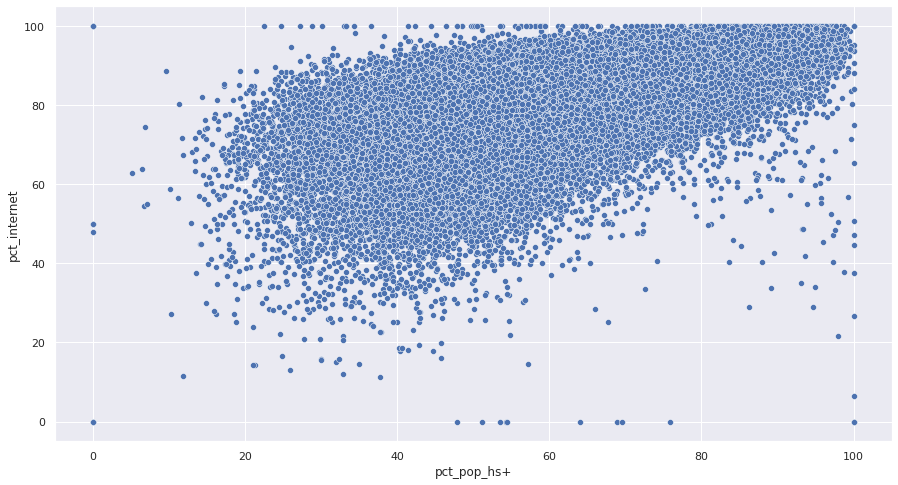

In [ ]:
# explore relationship between pct with high shcool vs. pct with bachelors degree
plt.figure(figsize = (15,8))
sns.scatterplot(data=df_broadband, x="pct_pop_hs+", y="pct_internet")

## we can see that the positive relationship makes sense since areas with higher %of high school degree are
## likely to have higher % of college degree

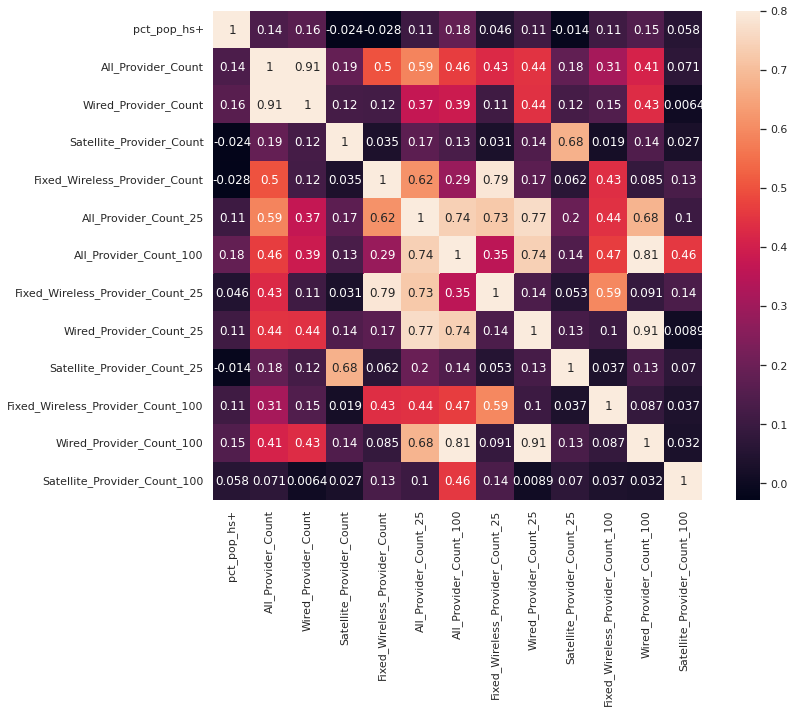

In [ ]:
#correlation matrix

cols = ['pct_pop_hs+',  'All_Provider_Count', 'Wired_Provider_Count',
       'Satellite_Provider_Count', 'Fixed_Wireless_Provider_Count',
       'All_Provider_Count_25', 'All_Provider_Count_100',
       'Fixed_Wireless_Provider_Count_25', 'Wired_Provider_Count_25',
       'Satellite_Provider_Count_25', 'Fixed_Wireless_Provider_Count_100',
       'Wired_Provider_Count_100', 'Satellite_Provider_Count_100']

corrmat = df_broadband[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);
plt.show()

In [ ]:
## get a list of numerical feature
numeric_feats = df_broadband.dtypes[df_broadband.dtypes != "object"].index
numeric_feats

Index(['tract_geoid', 'All_Provider_Count', 'Wired_Provider_Count',
       'Satellite_Provider_Count', 'Fixed_Wireless_Provider_Count',
       'All_Provider_Count_25', 'All_Provider_Count_100',
       'Fixed_Wireless_Provider_Count_25', 'Wired_Provider_Count_25',
       'Satellite_Provider_Count_25', 'Fixed_Wireless_Provider_Count_100',
       'Wired_Provider_Count_100', 'Satellite_Provider_Count_100',
       'total_pop2', 'median_age_overall', 'median_age_male',
       'median_age_female', 'state', 'county', 'tract', 'employment_rate',
       'median_income', 'total_households', 'ave_household_size',
       'ave_family_size', 'pct_health_ins_children', 'pct_health_ins_19_64',
       'pct_health_ins_65+', 'total_population', 'median_house_value',
       'pct_white', 'pct_hisp_latino', 'pct_black', 'pct_native', 'pct_asian',
       'pct_hi_pi', 'pct_other_race', 'pct_two+_race', 'pct_rent_burdened',
       'poverty_rate', 'pct_pop_bachelors+', 'pct_pop_hs+', 'pct_internet',
       'pct_

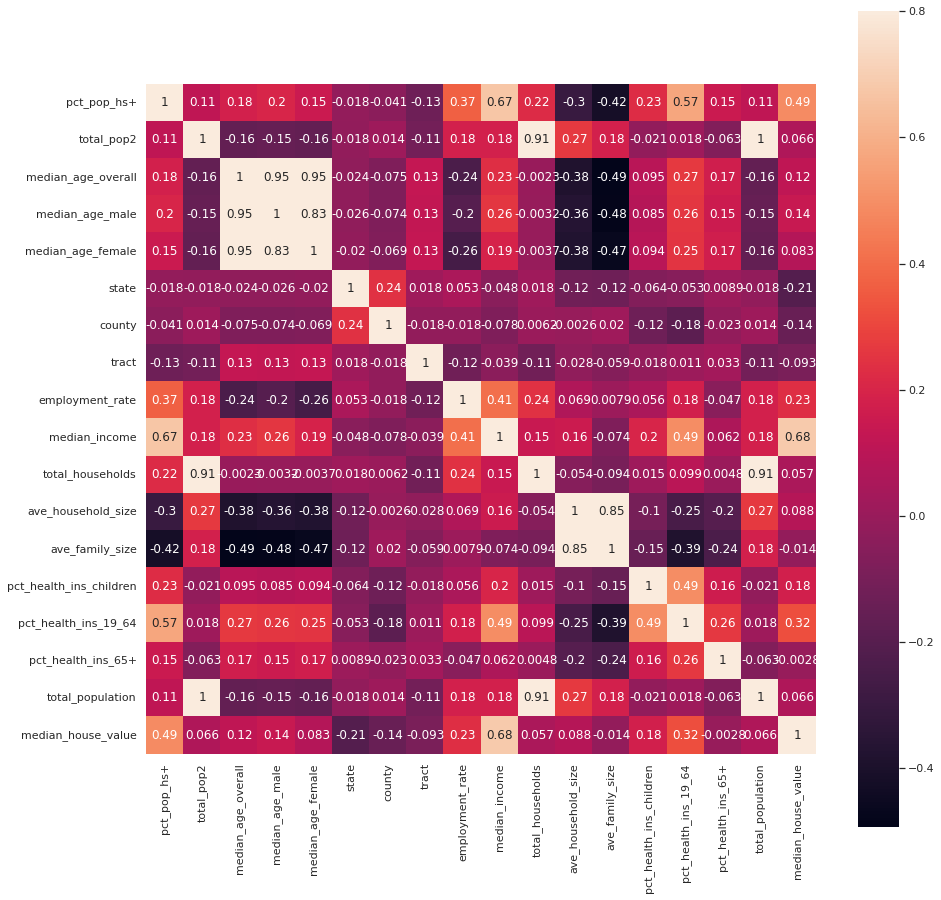

In [ ]:
#correlation matrix for census ethnicity variables

cols = ['pct_pop_hs+', 'total_pop2', 'median_age_overall', 'median_age_male',
       'median_age_female', 'state', 'county', 'tract', 'employment_rate',
       'median_income', 'total_households', 'ave_household_size',
       'ave_family_size', 'pct_health_ins_children', 'pct_health_ins_19_64',
       'pct_health_ins_65+', 'total_population', 'median_house_value']

corrmat = df_broadband[cols].corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);
plt.show()

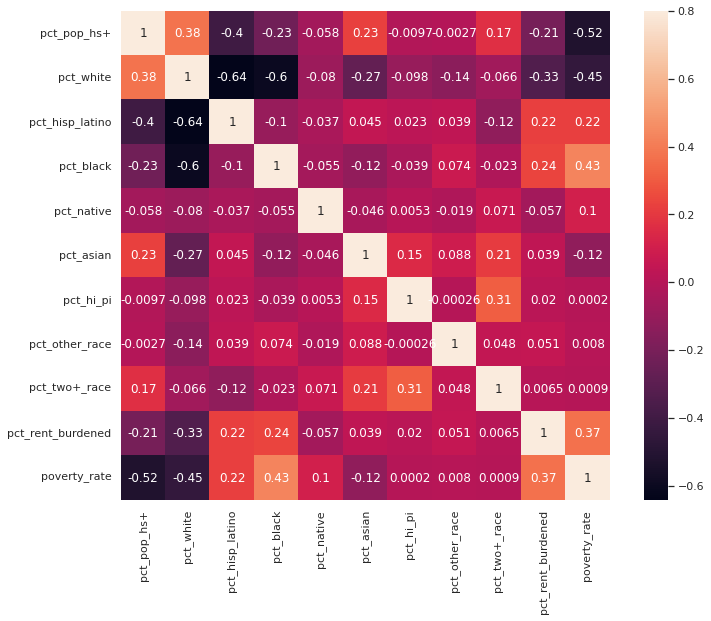

In [ ]:
#correlation matrix for census ethnicity variables

cols = ['pct_pop_hs+', 
       'pct_white', 'pct_hisp_latino', 'pct_black', 'pct_native', 'pct_asian',
       'pct_hi_pi', 'pct_other_race', 'pct_two+_race', 'pct_rent_burdened',
       'poverty_rate']

corrmat = df_broadband[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);
plt.show()

## pct white & asian have notable positive correlation to pct_pop_hs+
## poverty rate is strong negative correlation to pct_pop_hs+

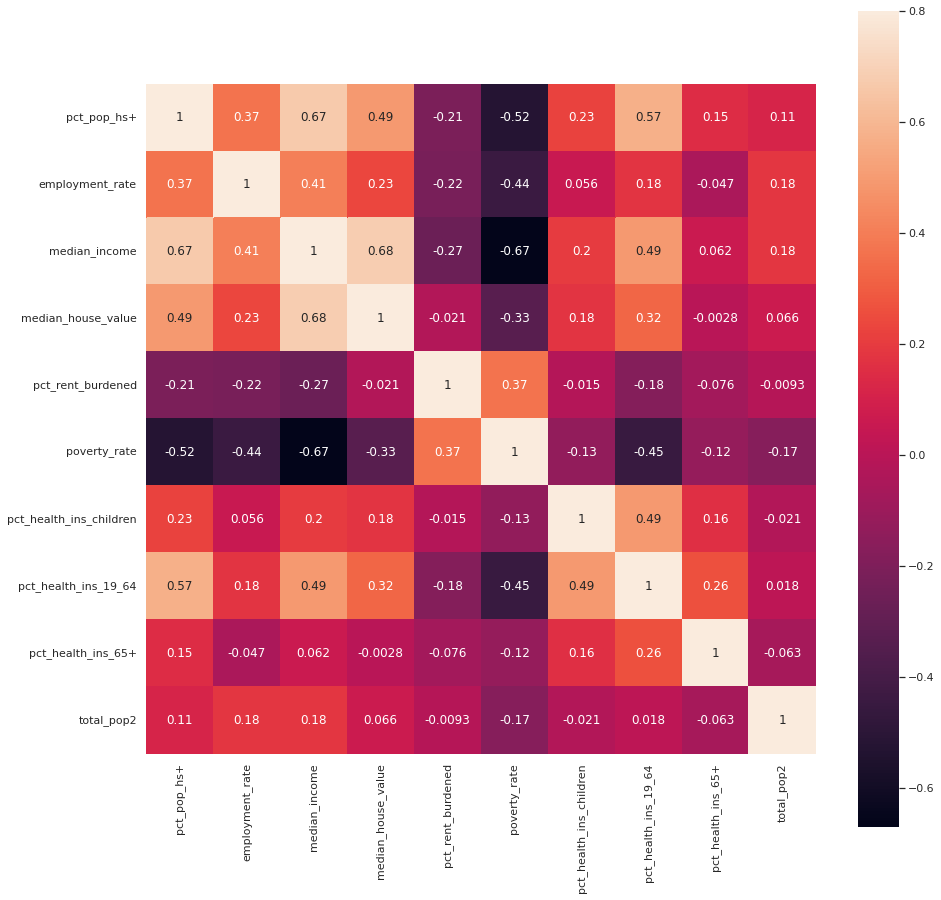

In [ ]:
#correlation matrix for census ethnicity variables

cols = ['pct_pop_hs+', 
               'employment_rate', 'median_income', 
       'median_house_value', 'pct_rent_burdened', 'poverty_rate',
       'pct_health_ins_children', 'pct_health_ins_19_64', 'pct_health_ins_65+',
       'total_pop2']

corrmat = df_broadband[cols].corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);
plt.show()

##high correlation between median income, rent insurance vs. pct high school

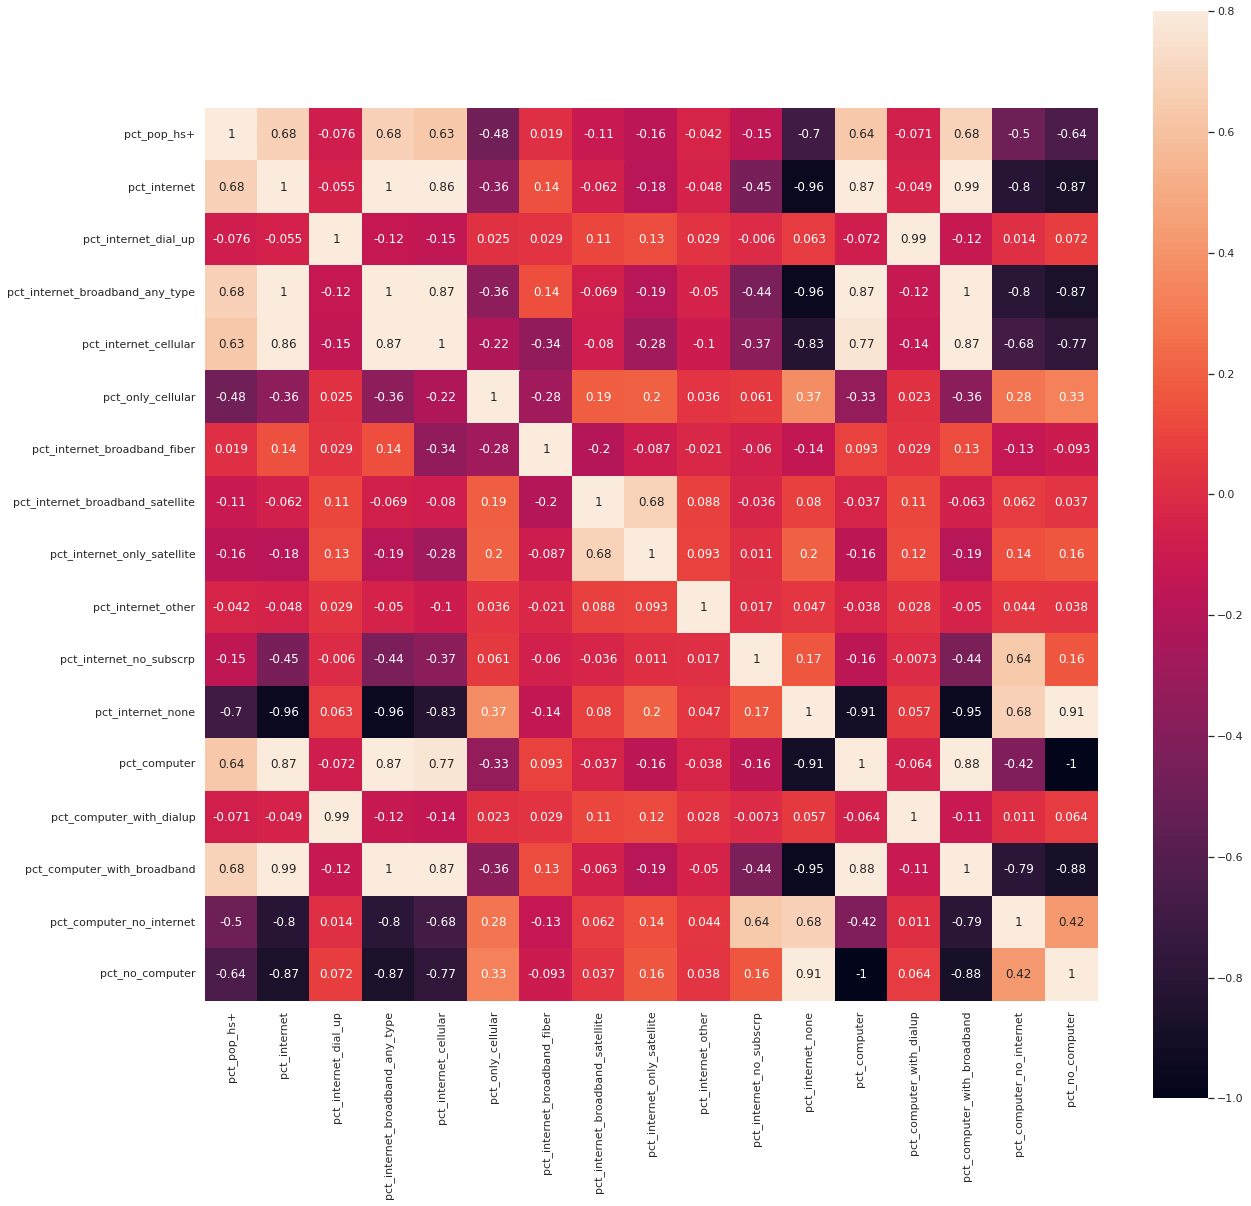

In [ ]:
#correlation matrix for census - internet related variables

cols = ['pct_pop_hs+', 
              'pct_internet',
       'pct_internet_dial_up', 'pct_internet_broadband_any_type',
       'pct_internet_cellular', 'pct_only_cellular',
       'pct_internet_broadband_fiber', 'pct_internet_broadband_satellite',
       'pct_internet_only_satellite', 'pct_internet_other',
       'pct_internet_no_subscrp', 'pct_internet_none', 'pct_computer',
       'pct_computer_with_dialup', 'pct_computer_with_broadband',
       'pct_computer_no_internet', 'pct_no_computer']

corrmat = df_broadband[cols].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);
plt.show()

## do see some higher correlation between pct access to internet/broadband/any type vs. pct_pop_hs

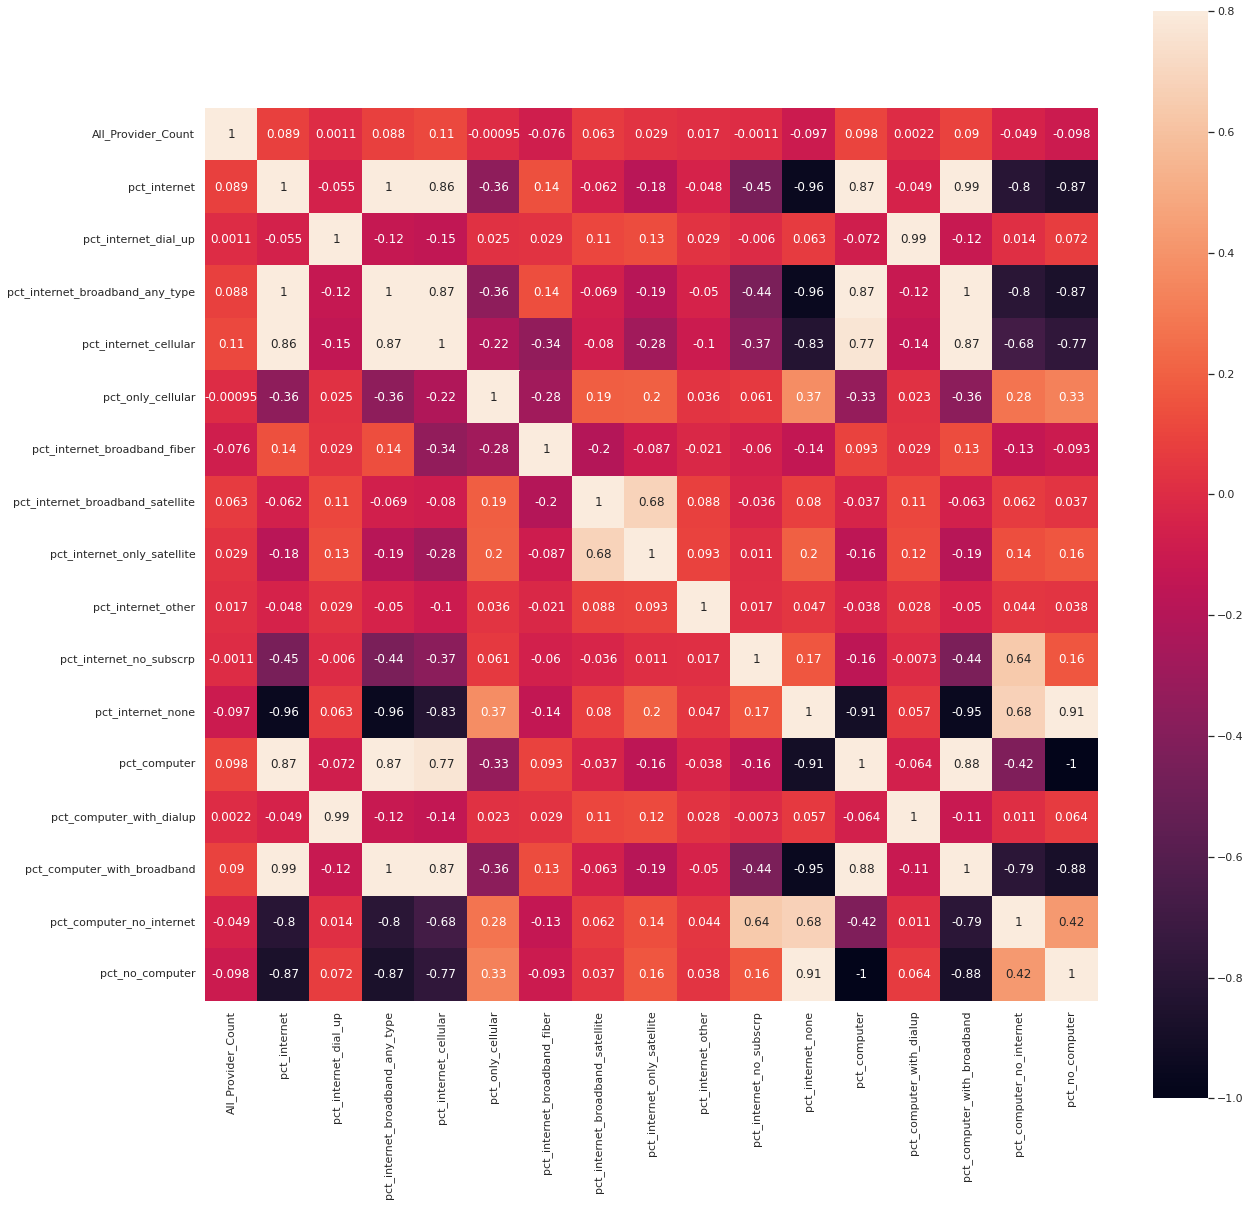

In [ ]:
#correlation matrix for broadband providers vs. pct internet stats

cols = [  'All_Provider_Count', 
       'pct_internet',
       'pct_internet_dial_up', 'pct_internet_broadband_any_type',
       'pct_internet_cellular', 'pct_only_cellular',
       'pct_internet_broadband_fiber', 'pct_internet_broadband_satellite',
       'pct_internet_only_satellite', 'pct_internet_other',
       'pct_internet_no_subscrp', 'pct_internet_none', 'pct_computer',
       'pct_computer_with_dialup', 'pct_computer_with_broadband',
       'pct_computer_no_internet', 'pct_no_computer']

corrmat = df_broadband[cols].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);
plt.show()

## very weak correlation between providers count vs. pct internet stats